# training dataset visulization

In [ ]:
# upload zip of amoebaDataset 
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

!unzip trainingDataset.zip

Saving trainingDataset.zip to trainingDataset.zip
User uploaded file "trainingDataset.zip" with length 24538774 bytes
Archive:  trainingDataset.zip
   creating: trainingDataset/annots/
  inflating: trainingDataset/annots/1.xml  
  inflating: trainingDataset/annots/10.xml  
  inflating: trainingDataset/annots/11.xml  
  inflating: trainingDataset/annots/12.xml  
  inflating: trainingDataset/annots/13.xml  
  inflating: trainingDataset/annots/14.xml  
  inflating: trainingDataset/annots/15.xml  
  inflating: trainingDataset/annots/16.xml  
  inflating: trainingDataset/annots/17.xml  
  inflating: trainingDataset/annots/18.xml  
  inflating: trainingDataset/annots/19.xml  
  inflating: trainingDataset/annots/2.xml  
  inflating: trainingDataset/annots/20.xml  
  inflating: trainingDataset/annots/21.xml  
  inflating: trainingDataset/annots/22.xml  
  inflating: trainingDataset/annots/23.xml  
  inflating: trainingDataset/annots/24.xml  
  inflating: trainingDataset/annots/25.xml  
  infla

In [ ]:
!rm -rf trainingDatasetVis

In [ ]:
from xml.etree import ElementTree

# function to extract bounding boxes from an annotation file
def extract_boxes(filename):
	tree = ElementTree.parse(filename)
	root = tree.getroot()
	boxes_pro = list()
	boxes_fow = list()
	for box,obj in zip(root.findall('.//bndbox'),root.findall('.//object')):
		if obj.find('name').text == 'Proteus Amoeba': 
			xmin = int(box.find('xmin').text)
			ymin = int(box.find('ymin').text)
			xmax = int(box.find('xmax').text)
			ymax = int(box.find('ymax').text)
			coors = [xmin, ymin, xmax, ymax]
			boxes_pro.append(coors)
		if obj.find('name').text == 'N.Fowleri Amoeba':
			xmin = int(box.find('xmin').text)
			ymin = int(box.find('ymin').text)
			xmax = int(box.find('xmax').text)
			ymax = int(box.find('ymax').text)
			coors = [xmin, ymin, xmax, ymax]
			boxes_fow.append(coors)
	width = int(root.find('.//size/width').text)
	height = int(root.find('.//size/height').text)
	return boxes_pro, boxes_fow, width, height

# extract details form annotation file
boxes_pro,boxes_fow, w, h = extract_boxes('trainingDataset/annots/1.xml')
# summarize extracted details
print(boxes_pro, boxes_fow, w, h)

[[232, 434, 348, 590]] [[338, 1101, 440, 1200]] 1024 1536


In [ ]:
def save_actual(image, boxes_pro, boxes_fow, filename):
  image = np.asanyarray(image)
  #scaled_image = mold_image(image, cfg)
  #image = expand_dims(image, 0)
  pyplot.imshow(image)
  ax = pyplot.gca()
  pyplot.axis("off")
  #boxes, w, h = extract_boxes(filename)
  for box_pro, box_fow in zip(boxes_pro, boxes_fow):
    xmin1, ymin1, xmax1, ymax1 = box_pro
    width1, height1 = xmax1 - xmin1, ymax1 - ymin1
    rect1 = Rectangle((xmin1, ymin1), width1, height1, fill=False, color='red')

    xmin2, ymin2, xmax2, ymax2 = box_fow
    width2, height2 = xmax2 - xmin2, ymax2 - ymin2
    rect2 = Rectangle((xmin2, ymin2), width2, height2, fill=False, color='green')
    ax.add_patch(rect1)
    ax.add_patch(rect2)

  filename ="trainingDatasetVis/" + filename
  pyplot.savefig(filename, bbox_inches='tight',pad_inches=0.0)
  pyplot.show()

1.jpg
1.xml


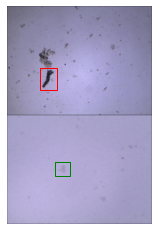

10.jpg
10.xml


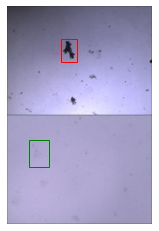

11.jpg
11.xml


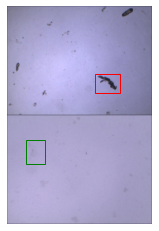

12.jpg
12.xml


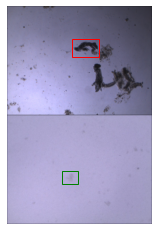

13.jpg
13.xml


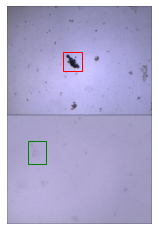

14.jpg
14.xml


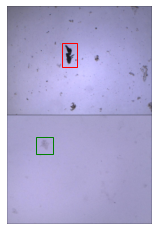

15.jpg
15.xml


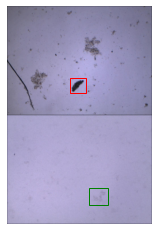

16.jpg
16.xml


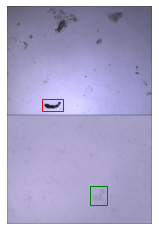

17.jpg
17.xml


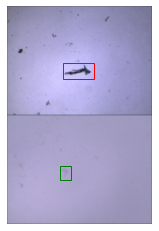

18.jpg
18.xml


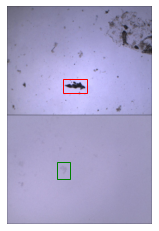

19.jpg
19.xml


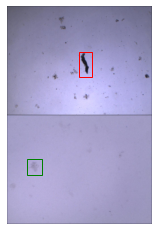

2.jpg
2.xml


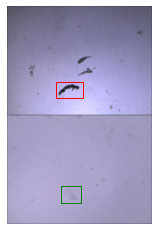

20.jpg
20.xml


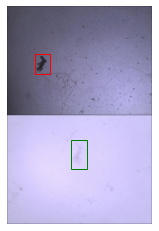

21.jpg
21.xml


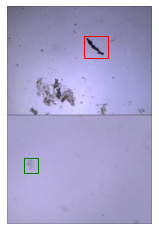

22.jpg
22.xml


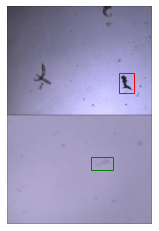

23.jpg
23.xml


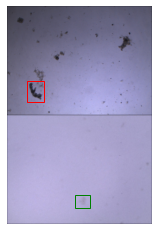

24.jpg
24.xml


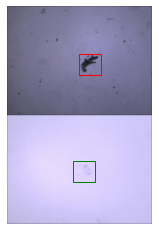

25.jpg
25.xml


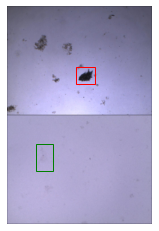

26.jpg
26.xml


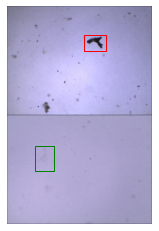

27.jpg
27.xml


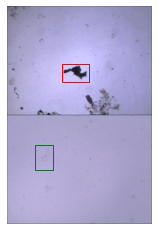

28.jpg
28.xml


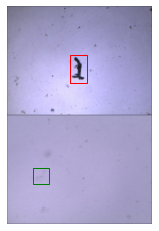

29.jpg
29.xml


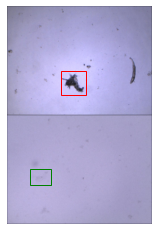

3.jpg
3.xml


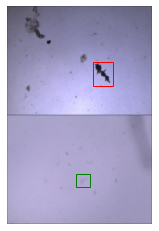

30.jpg
30.xml


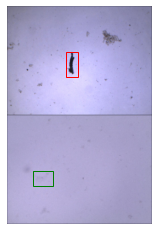

31.jpg
31.xml


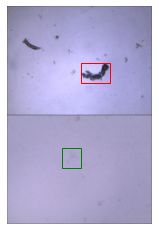

32.jpg
32.xml


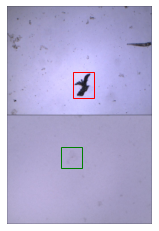

33.jpg
33.xml


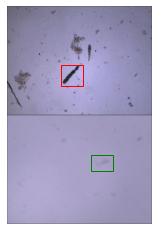

34.jpg
34.xml


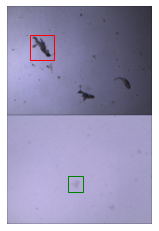

35.jpg
35.xml


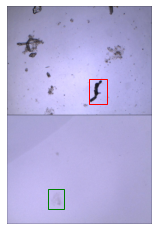

36.jpg
36.xml


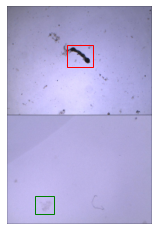

37.jpg
37.xml


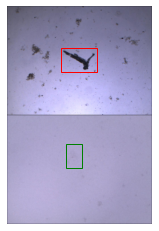

38.jpg
38.xml


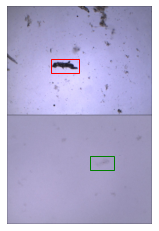

39.jpg
39.xml


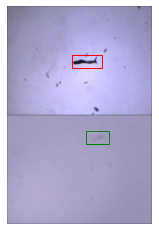

4.jpg
4.xml


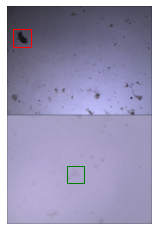

40.jpg
40.xml


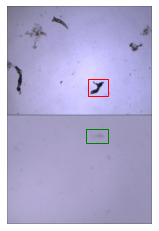

41.jpg
41.xml


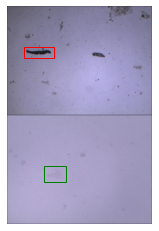

42.jpg
42.xml


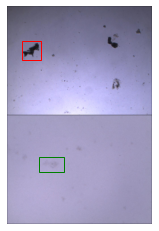

43.jpg
43.xml


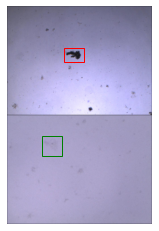

44.jpg
44.xml


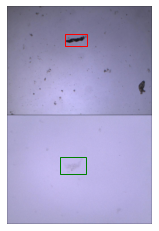

45.jpg
45.xml


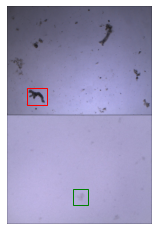

46.jpg
46.xml


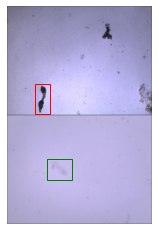

47.jpg
47.xml


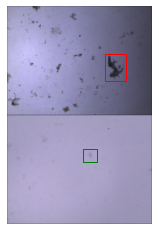

48.jpg
48.xml


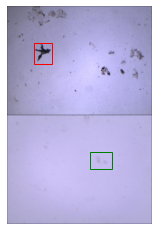

49.jpg
49.xml


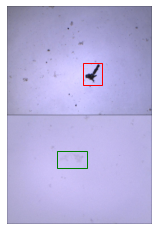

5.jpg
5.xml


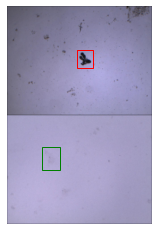

50.jpg
50.xml


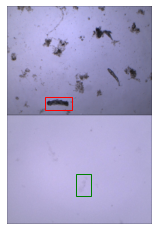

51.jpg
51.xml


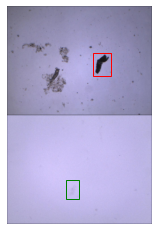

52.jpg
52.xml


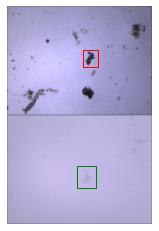

53.jpg
53.xml


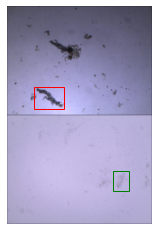

54.jpg
54.xml


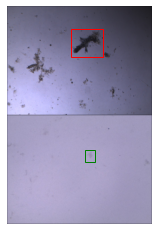

55.jpg
55.xml


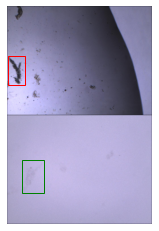

56.jpg
56.xml


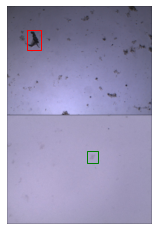

57.jpg
57.xml


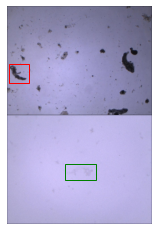

58.jpg
58.xml


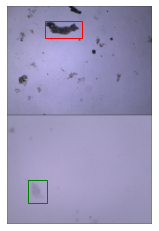

59.jpg
59.xml


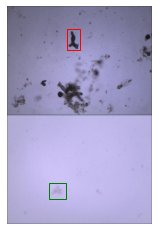

6.jpg
6.xml


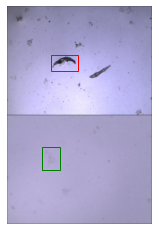

60.jpg
60.xml


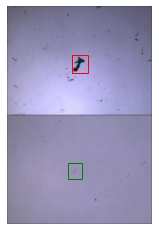

61.jpg
61.xml


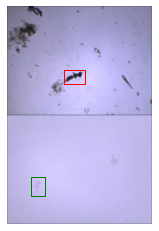

62.jpg
62.xml


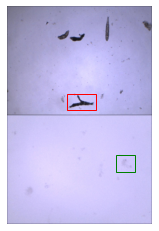

7.jpg
7.xml


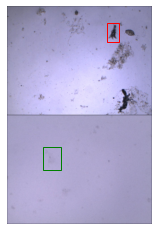

8.jpg
8.xml


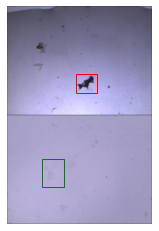

9.jpg
9.xml


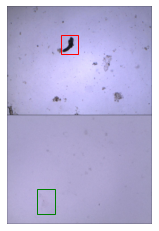

In [ ]:
from PIL import Image 
import os
from os import listdir
import numpy as np
from numpy import expand_dims
from matplotlib import pyplot
from matplotlib.patches import Rectangle
if not os.path.exists("actualImages"):
  os.mkdir("actualImages")

images_dir = "trainingDataset/images"
annots_dir = "trainingDataset/annots"
img_files = listdir(images_dir)
img_files.sort()
annot_files = listdir(annots_dir)
annot_files.sort()

if not os.path.exists("trainingDatasetVis"):
  os.mkdir("trainingDatasetVis")

for img, annot in zip(img_files, annot_files):
  print(img)
  print(annot)
  annot_path = annots_dir +"/"+ annot
  boxes_pro,boxes_fow, _, _ = extract_boxes(annot_path)
  img_path = images_dir + "/" + img
  image = Image.open(img_path)
  image = np.asanyarray(image)
  save_actual(image, boxes_pro,boxes_fow, img)

In [ ]:
!zip -r trainingDatasetVis.zip trainingDatasetVis
from google.colab import files
files.download("trainingDatasetVis.zip")

  adding: trainingDatasetVis/ (stored 0%)
  adding: trainingDatasetVis/46.jpg (deflated 2%)
  adding: trainingDatasetVis/10.jpg (deflated 2%)
  adding: trainingDatasetVis/61.jpg (deflated 2%)
  adding: trainingDatasetVis/55.jpg (deflated 2%)
  adding: trainingDatasetVis/40.jpg (deflated 2%)
  adding: trainingDatasetVis/41.jpg (deflated 2%)
  adding: trainingDatasetVis/6.jpg (deflated 2%)
  adding: trainingDatasetVis/49.jpg (deflated 2%)
  adding: trainingDatasetVis/53.jpg (deflated 2%)
  adding: trainingDatasetVis/27.jpg (deflated 2%)
  adding: trainingDatasetVis/39.jpg (deflated 2%)
  adding: trainingDatasetVis/59.jpg (deflated 2%)
  adding: trainingDatasetVis/56.jpg (deflated 2%)
  adding: trainingDatasetVis/42.jpg (deflated 2%)
  adding: trainingDatasetVis/4.jpg (deflated 2%)
  adding: trainingDatasetVis/54.jpg (deflated 2%)
  adding: trainingDatasetVis/17.jpg (deflated 2%)
  adding: trainingDatasetVis/1.jpg (deflated 2%)
  adding: trainingDatasetVis/52.jpg (deflated 2%)
  adding: t

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# test dataset visulization

In [ ]:
# upload zip of amoebaDataset 
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

!unzip testDataset.zip

Saving testDataset.zip to testDataset.zip
User uploaded file "testDataset.zip" with length 3878597 bytes
Archive:  testDataset.zip
   creating: testDataset/annots/
  inflating: testDataset/annots/63.xml  
  inflating: testDataset/annots/64.xml  
  inflating: testDataset/annots/65.xml  
  inflating: testDataset/annots/66.xml  
  inflating: testDataset/annots/67.xml  
  inflating: testDataset/annots/68.xml  
  inflating: testDataset/annots/69.xml  
  inflating: testDataset/annots/70.xml  
  inflating: testDataset/annots/71.xml  
  inflating: testDataset/annots/72.xml  
   creating: testDataset/images/
  inflating: testDataset/images/63.jpg  
  inflating: testDataset/images/64.jpg  
  inflating: testDataset/images/65.jpg  
  inflating: testDataset/images/66.jpg  
  inflating: testDataset/images/67.jpg  
  inflating: testDataset/images/68.jpg  
  inflating: testDataset/images/69.jpg  
  inflating: testDataset/images/70.jpg  
  inflating: testDataset/images/71.jpg  
  inflating: testDataset

In [ ]:
!rm -rf testDatasetVis

In [ ]:
from xml.etree import ElementTree

# function to extract bounding boxes from an annotation file
def extract_boxes(filename):
	tree = ElementTree.parse(filename)
	root = tree.getroot()
	boxes_pro = list()
	boxes_fow = list()
	for box,obj in zip(root.findall('.//bndbox'),root.findall('.//object')):
		if obj.find('name').text == 'Proteus Amoeba': 
			xmin = int(box.find('xmin').text)
			ymin = int(box.find('ymin').text)
			xmax = int(box.find('xmax').text)
			ymax = int(box.find('ymax').text)
			coors = [xmin, ymin, xmax, ymax]
			boxes_pro.append(coors)
		if obj.find('name').text == 'N.Fowleri Amoeba':
			xmin = int(box.find('xmin').text)
			ymin = int(box.find('ymin').text)
			xmax = int(box.find('xmax').text)
			ymax = int(box.find('ymax').text)
			coors = [xmin, ymin, xmax, ymax]
			boxes_fow.append(coors)
	width = int(root.find('.//size/width').text)
	height = int(root.find('.//size/height').text)
	return boxes_pro, boxes_fow, width, height

# extract details form annotation file
boxes_pro,boxes_fow, w, h = extract_boxes('testDataset/annots/63.xml')
# summarize extracted details
print(boxes_pro, boxes_fow, w, h)

[[256, 444, 360, 590]] [[127, 1088, 243, 1193]] 1024 1536


In [ ]:
def save_actual(image, boxes_pro, boxes_fow, filename):
  image = np.asanyarray(image)
  #scaled_image = mold_image(image, cfg)
  #image = expand_dims(image, 0)
  pyplot.imshow(image)
  ax = pyplot.gca()
  pyplot.axis("off")
  #boxes, w, h = extract_boxes(filename)
  for box_pro, box_fow in zip(boxes_pro, boxes_fow):
    xmin1, ymin1, xmax1, ymax1 = box_pro
    width1, height1 = xmax1 - xmin1, ymax1 - ymin1
    rect1 = Rectangle((xmin1, ymin1), width1, height1, fill=False, color='red')

    xmin2, ymin2, xmax2, ymax2 = box_fow
    width2, height2 = xmax2 - xmin2, ymax2 - ymin2
    rect2 = Rectangle((xmin2, ymin2), width2, height2, fill=False, color='green')
    ax.add_patch(rect1)
    ax.add_patch(rect2)

  filename ="testDatasetVis/" + filename
  pyplot.savefig(filename, bbox_inches='tight',pad_inches=0.0)
  pyplot.show()

63.jpg
63.xml


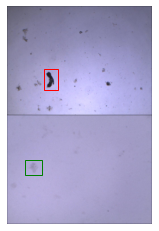

64.jpg
64.xml


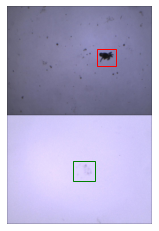

65.jpg
65.xml


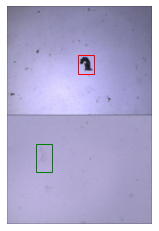

66.jpg
66.xml


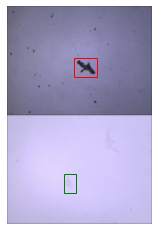

67.jpg
67.xml


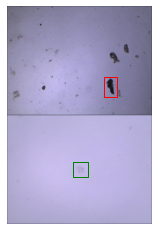

68.jpg
68.xml


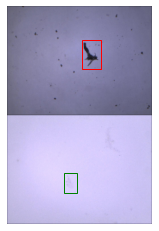

69.jpg
69.xml


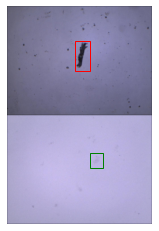

70.jpg
70.xml


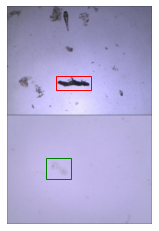

71.jpg
71.xml


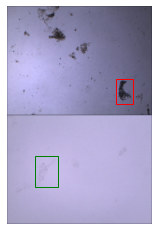

72.jpg
72.xml


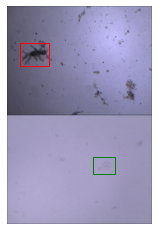

In [ ]:
from PIL import Image 
import os
from os import listdir
import numpy as np
from numpy import expand_dims
from matplotlib import pyplot
from matplotlib.patches import Rectangle
if not os.path.exists("actualImages"):
  os.mkdir("actualImages")

images_dir = "testDataset/images"
annots_dir = "testDataset/annots"
img_files = listdir(images_dir)
img_files.sort()
annot_files = listdir(annots_dir)
annot_files.sort()

if not os.path.exists("testDatasetVis"):
  os.mkdir("testDatasetVis")

for img, annot in zip(img_files, annot_files):
  print(img)
  print(annot)
  annot_path = annots_dir +"/"+ annot
  boxes_pro,boxes_fow, _, _ = extract_boxes(annot_path)
  img_path = images_dir + "/" + img
  image = Image.open(img_path)
  image = np.asanyarray(image)
  save_actual(image, boxes_pro,boxes_fow, img)

In [ ]:
!zip -r testDatasetVis.zip testDatasetVis
from google.colab import files
files.download("testDatasetVis.zip")

  adding: testDatasetVis/ (stored 0%)
  adding: testDatasetVis/65.jpg (deflated 2%)
  adding: testDatasetVis/63.jpg (deflated 2%)
  adding: testDatasetVis/72.jpg (deflated 2%)
  adding: testDatasetVis/67.jpg (deflated 2%)
  adding: testDatasetVis/66.jpg (deflated 3%)
  adding: testDatasetVis/68.jpg (deflated 3%)
  adding: testDatasetVis/69.jpg (deflated 3%)
  adding: testDatasetVis/64.jpg (deflated 3%)
  adding: testDatasetVis/70.jpg (deflated 2%)
  adding: testDatasetVis/71.jpg (deflated 2%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>